<a href="https://colab.research.google.com/github/anas-awadalla/Incepto/blob/master/Logistic_Regression_Decision_Boundary_OOD_Visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
def stratified_split(X, y, test_size=0.5):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=test_size)

    return X_train, y_train, X_test, y_test

In [ ]:
def load_characteristics(filename):
    """
    Load the calculated scores
    return: data and label of input score
    """
    X, Y = None, None
    
    data = np.load(filename)
    
    if X is None:
        X = data[:, :-1]
    else:
        X = np.concatenate((X, data[:, :-1]), axis=1)
    if Y is None:
        Y = data[:, -1] # labels only need to load once
         
    return X, Y

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

total_X, total_Y = load_characteristics("ood.npy")
X_val, Y_val, X_test, Y_test = stratified_split(total_X, total_Y)
                
X_train, Y_train, X_val_for_test, Y_val_for_test = stratified_split(X_val, Y_val, test_size=0.5)
lr = LogisticRegressionCV(n_jobs=-1, max_iter=1000).fit(X_train, Y_train)
                
y_pred = lr.predict_proba(X_train)[:, 1]
                
X_embedded = PCA(n_components=2).fit_transform(total_X)


In [ ]:
total_y_predicted = lr.predict(total_X)
total_y_confidence = lr.predict_proba(total_X)

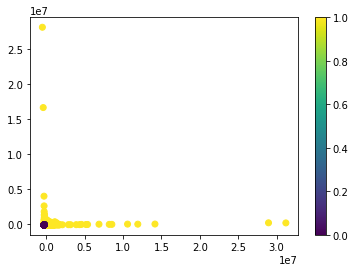

In [ ]:
plt.scatter(X_embedded[:,0],X_embedded[:,1] , c=total_y_predicted)
plt.colorbar()
plt.draw()

In [ ]:
average_x = 0
average_y = 0
count = 0

for i,j in zip(X_embedded, total_y_predicted):
  if j == 0:
    average_x+= i[0]
    average_y += i[1]
    count += 1

average_x/=count
average_y/=count

print(average_x)
print(average_y)

-280682.16849974665
-66367.36098143006


In [ ]:
# Distance vs Confidence
distance = []
confidence = []

for index in range(len(total_X)):
  distance.append(np.linalg.norm(np.array(average_x,average_y) - np.array(X_embedded[index,0],X_embedded[index,1])))
  confidence.append(total_y_confidence[index,1])

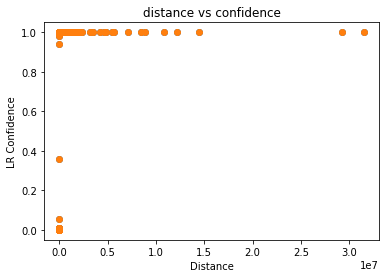

In [ ]:
plt.scatter(distance, confidence) 
plt.title('distance vs confidence')
plt.xlabel('Distance')
plt.ylabel('LR Confidence')
plt.scatter(distance, confidence)
plt.show()

In [ ]:
X_in_dist = []
X_ood = []

for i,j in zip(X_embedded, total_y_predicted):
  if j == 0:
    X_in_dist.append(i)
  else :
    X_ood.append(i)

X_in_dist = np.array(X_in_dist)
X_ood = np.array(X_ood)

In [ ]:
def closest_node(node, nodes):
    nodes = np.asarray(nodes)
    deltas = nodes - node
    dist_2 = np.einsum('ij,ij->i', deltas, deltas)
    return np.argmin(dist_2)


In [ ]:
closest_avg_idx = closest_node(X_in_dist,np.asarray([[average_x,average_y]]))

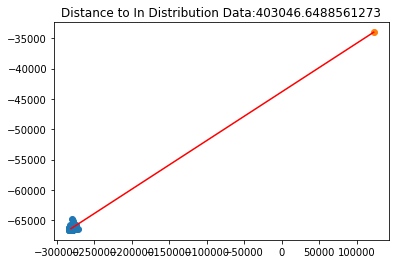

In [ ]:
from sklearn.metrics import pairwise_distances
index = 330  #@param {type: "slider", min: 0, max: 1226}

# cos_sim = pairwise_distances(X_in_dist[closest_avg_idx].reshape(1, -1),X_ood[index].reshape(1, -1), metric="cosine")

plt.scatter(X_in_dist[:,0],X_in_dist[:,1])
plt.scatter(X_ood[index,0], X_ood[index,1])
plt.plot([average_x,X_ood[index,0]],[average_y,X_ood[index,1]],'r')
dist = np.linalg.norm(np.array(average_x,average_y) - np.array(X_ood[index,0],X_ood[index,1]))
plt.title("Distance to In Distribution Data:"+str(dist))#+"\n Cosine Similarity to Relative Middle Point: "+str(cos_sim[0][0]))
plt.draw()


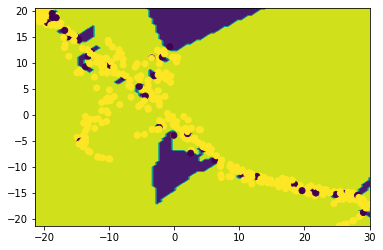

In [ ]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.datasets.base import load_iris
from sklearn.manifold.t_sne import TSNE
from sklearn.linear_model.logistic import LogisticRegression

# create meshgrid
resolution = 100 # 100x100 background pixels
X2d_xmin, X2d_xmax = np.min(X_Train_embedded[:,0]), np.max(X_Train_embedded[:,0])
X2d_ymin, X2d_ymax = np.min(X_Train_embedded[:,1]), np.max(X_Train_embedded[:,1])
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

# approximate Voronoi tesselation on resolution x resolution grid using 1-NN
background_model = KNeighborsClassifier(n_neighbors=1).fit(X_Train_embedded, Y_train) 
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
plt.contourf(xx, yy, voronoiBackground)
plt.scatter(X_Train_embedded[:,0], X_Train_embedded[:,1], c=Y_train)
plt.show()
